News Sentiment Analysis:
1. The Scatter plot below shows the relastionship between the "tweet polarity" and how "long ago" it was tweeted for five news sources. The five news sources are as follows; bbc, cbs, CNN, foxnews and nytimes. As you can see it is very scattered, however you can clearly see that majority of the tweets for all five sources tend to be under 0.0, which implies that most tweets have a negative score on the vader sentiment scale. We need to take into account about what is happening today (June 2018) with President Donald Trump and the most recent Travel Ban affecting those underdeveloped countries

2. According to the scatterplot CNN's most recent tweet almost reaches a score of -1 on the vader sentiment scale scale. If we take a closer look at CNN's tweet on June 29th, 11:52am, it says the following : "An Ivy League student activist who fought sexual violence has been accused of sex crimes against children" This status is broken own into deperate words,its a process called tokenization. You can clearly see all the negative words used in this status. 

3. Most of the tweets had a compound score of 0, in which they appeared to be clustered together on the line. Implying that all five media sources reporting these tweets at this time did not have a large impact during the analysis  

4. Looking at my overrall media sentiment bar graph, you can see that that foxnews has not only the least average tweets, but they seem to be the only with possitive or neutral score on the vader sentiment scale.



In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import time
from datetime import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from API_keys import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
target_users = ["@BBCWorld", "@CBSNews", "@CNN", "@FoxNews", "@nytimes"]

In [3]:
# Variables for holding sentiments
source_account = []
text = []
date = []
tweets_ago = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []


# Looping through all target users
for user in target_users:
     # Variable for holding the oldest tweet
    oldest_tweet = None

    tweet_count = 0
    # Get the last 100 tweets
    for x in range(5):
        # get all tweets from the home feed
        public_tweets = api.user_timeline(user, count=100, result_type="recent", max_id=oldest_tweet)
        #loop through all tweets
        for tweet in public_tweets:
            # keep adding the tweet_count
            tweet_count +=1
            #append values to empty lists
            source_account.append(user)
            text.append(tweet['text'])
            date.append(tweet['created_at'])
            tweets_ago.append(tweet_count)
            
            # Run the Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet['text'])['compound']
            pos = analyzer.polarity_scores(tweet['text'])['pos']
            neg = analyzer.polarity_scores(tweet['text'])['neg']
            neu = analyzer.polarity_scores(tweet['text'])['neu']
            
            # append the values to the lists 
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)

In [8]:
# Create a dictionary for the DataFrame
tweet_sentiment = {
    "Source Account": source_account,
    "Tweet": text,
    "Date": date,
    "Tweets Ago": tweets_ago,
    "Compound Score": compound_list,
    "Positive Score": positive_list,
    "Negative Score": negative_list,
    "Neutral Score":  neutral_list,
    
}

tweets_df = pd.DataFrame(tweet_sentiment, columns = ['Source Account',
                                                     'Tweet',
                                                     'Date',
                                                     'Tweets Ago',
                                                     'Compound Score',
                                                     'Positive Score',
                                                     'Negative Score',
                                                     'Neutral Score'])
tweets_df.head()

,Source Account,Tweet,Date,Tweets Ago,Compound Score,Positive Score,Negative Score,Neutral Score
0,@BBCWorld,'Abacha loot' to be given to poor Nigerians ht...,Fri Jun 29 15:44:02 +0000 2018,1,-0.4767,0.000,0.279,0.721
1,@BBCWorld,😞 https://t.co/Og4YuJNhiD,Fri Jun 29 15:05:15 +0000 2018,2,-0.4767,0.000,0.608,0.392
2,@BBCWorld,Ken Isaacs: UN migration agency rejects Trump ...,Fri Jun 29 14:58:28 +0000 2018,3,-0.4939,0.000,0.286,0.714
3,@BBCWorld,Saudi rapper Leesa A celebrates end of country...,Fri Jun 29 14:52:34 +0000 2018,4,0.0258,0.174,0.169,0.657
4,@BBCWorld,What went wrong for Africa at the World Cup? h...,Fri Jun 29 14:45:34 +0000 2018,5,-0.4767,0.000,0.256,0.744


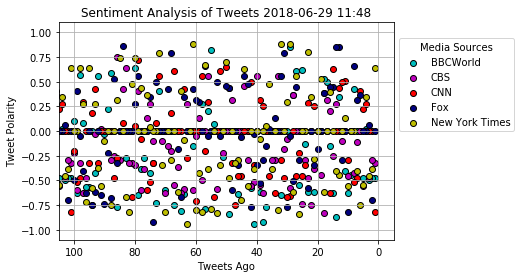

In [5]:
#plotting twitter info by source
# locating bbc,cbs,cnn,fo,nyt
bbc = tweets_df.loc[tweets_df['Source Account'] == '@BBCWorld']
cbs = tweets_df.loc[tweets_df['Source Account'] == '@CBSNews']
cnn = tweets_df.loc[tweets_df['Source Account'] == '@CNN']
fox = tweets_df.loc[tweets_df['Source Account'] == '@FoxNews']
nyt = tweets_df.loc[tweets_df['Source Account'] == '@nytimes']

# Plotting Twitter info
plt.scatter(bbc['Tweets Ago'], bbc['Compound Score'], c='c', edgecolor='k', label='BBCWorld')
plt.scatter(cbs['Tweets Ago'], cbs['Compound Score'], c='m', edgecolor='k', label='CBS')
plt.scatter(cnn['Tweets Ago'], cnn['Compound Score'], c='r', edgecolor='k', label='CNN')
plt.scatter(fox['Tweets Ago'], fox['Compound Score'], c='navy', edgecolor='k', label='Fox')
plt.scatter(nyt['Tweets Ago'], nyt['Compound Score'], c='y', edgecolor='k', label='New York Times')
# Adjusting dimensions & labels
plt.title(f"Sentiment Analysis of Tweets {datetime.now().strftime('%Y-%m-%d %H:%M')}")
plt.xlabel("Tweets Ago")
plt.xlim(105,-5)
plt.ylabel("Tweet Polarity")
plt.ylim(-1.1,1.1)
plt.legend(bbox_to_anchor=(1, 0.95), title='Media Sources', fontsize='medium')
plt.grid(True)
plt.savefig("Images1/Sentiment_Analysis_of_Tweets.png", bbox_inches="tight")
plt.show()


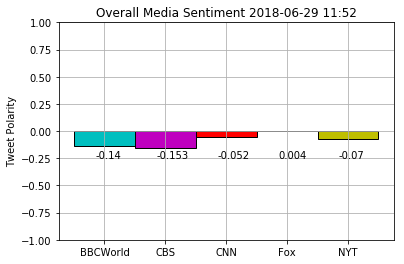

In [11]:
#plot a bar graph to show overall sentiment analysis of 100 tweets per source

plt.bar(0, bbc['Compound Score'].mean(), color='c', edgecolor='k', width=1)
plt.bar(1, cbs['Compound Score'].mean(), color='m', edgecolor='k', width=1)
plt.bar(2, cnn['Compound Score'].mean(), color='r', edgecolor='k', width=1)
plt.bar(3, fox['Compound Score'].mean(), color='navy', edgecolor='k', width=1)
plt.bar(4, nyt['Compound Score'].mean(), color='y', edgecolor='k', width=1)

#adjusting labels
plt.title(f"Overall Media Sentiment {datetime.now().strftime('%Y-%m-%d %H:%M')}")
plt.ylabel("Tweet Polarity")
plt.ylim(-1,1)

x_labels = ["BBCWorld", "CBS", "CNN", "Fox", "NYT"]

x_locations = [value for value in np.arange(5)]
plt.xticks(x_locations, x_labels)

for a,b in zip(np.arange(5), [bbc['Compound Score'].mean(),
                              cbs['Compound Score'].mean(),
                              cnn['Compound Score'].mean(),
                             fox['Compound Score'].mean(),
                              nyt['Compound Score'].mean()]):
    if b > 0:
        plt.text(a-0.15,b-b-0.25,str(round(b,3)))
    else:
        plt.text(a-0.15,b-b-0.25,str(round(b,3)))


plt.savefig("Images1/Overall_Media_Sentiment.png", bbox_inches="tight")
plt.grid(True)

plt.show()
